In [14]:
#data manipulation libraries

import pandas as pd
#data manipulation libraries
import csv
import pandas as pd
import numpy as np
import re
import string

#methods and stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

##Machine Learning Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings ("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filename=r"D:\Russia Ukraine war Dataset\0401_UkraineCombinedTweetsDeduped.csv.gzip" #import the file from local path
df = pd.read_csv(filename, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL) #convert the file to dataframe

In [5]:
df.drop_duplicates(subset ="text",  
                     keep = False, inplace = True) #dropping retweets from the tweet dataset. Most of the retweets are registered as duplicates of original

df.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654
5,799652508771766274,Judson_Bennett,"Coastal Network founder. Advocate, journalist,...",NaN,766,2024,4601,2016-11-18 16:36:29.000000,1509681952000937999,2022-04-01 00:00:00.000000,1,The Amazing story of Former Sussex County Dela...,"[{'text': 'Russia', 'indices': [208, 215]}, {'...",en,NaN,0,2022-04-01 00:14:21.490394
9,1275475606684172290,medyanews_,"Medya News offers news, stories, columns, rese...","Kurdistan, Worldwide",167,6102,6651,2020-06-23 17:07:56.000000,1509681953418711050,2022-04-01 00:00:00.000000,0,"""The image that Russia acquired over the past ...","[{'text': 'Putin', 'indices': [69, 75]}, {'tex...",en,NaN,0,2022-04-01 00:44:20.080995
11,1086730932667568128,QueerTestimony,"Church Leader. BA- MBI\nEarth Scientist. BS, M...","Ontario, Canada",470,261,7766,2019-01-19 21:03:39.000000,1509681953636700160,2022-04-01 00:00:00.000000,0,Sad to read of the #RussianArmy invading of #C...,"[{'text': 'RussianArmy', 'indices': [19, 31]},...",en,NaN,0,2022-04-01 00:09:36.929425
12,615314107,alain_4u,#العين_الإخبارية.. موقع إخباري رقمي، يغطي أخبا...,أخبار العالم,8,784928,244813,2012-06-22 16:20:43.000000,1509681953947074560,2022-04-01 00:00:01.000000,0,الرئيس الروسي يصعد رده على العقوبات الغربية بع...,"[{'text': 'عينك_على_العالم', 'indices': [58, 7...",ar,NaN,7,2022-04-01 00:09:36.905343


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75078 entries, 2 to 364874
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          75078 non-null  int64 
 1   username        75078 non-null  object
 2   acctdesc        64724 non-null  object
 3   location        47605 non-null  object
 4   following       75078 non-null  int64 
 5   followers       75078 non-null  int64 
 6   totaltweets     75078 non-null  int64 
 7   usercreatedts   75078 non-null  object
 8   tweetid         75078 non-null  int64 
 9   tweetcreatedts  75078 non-null  object
 10  retweetcount    75078 non-null  int64 
 11  text            75078 non-null  object
 12  hashtags        75078 non-null  object
 13  language        75078 non-null  object
 14  coordinates     86 non-null     object
 15  favorite_count  75078 non-null  int64 
 16  extractedts     75078 non-null  object
dtypes: int64(7), object(10)
memory usage: 10.3+ MB


In [128]:
print(f"Number of unique languages in this DataFrame: {df['language'].nunique()} ")
df["language"].unique()

Number of unique languages in this DataFrame: 61 


array(['en', 'ar', 'es', 'tr', 'fr', 'no', 'uk', 'und', 'de', 'it', 'in',
       'ja', 'zh', 'cs', 'eu', 'ru', 'et', 'sv', 'pt', 'ht', 'hi', 'da',
       'or', 'sl', 'fa', 'bg', 'lv', 'nl', 'el', 'pl', 'iw', 'th', 'ca',
       'lt', 'tl', 'ta', 'ro', 'hu', 'fi', 'ur', 'mr', 'sr', 'gu', 'ne',
       'ml', 'vi', 'is', 'kn', 'ko', 'bn', 'ka', 'te', 'cy', 'pa', 'ckb',
       'my', 'hy', 'am', 'ps', 'si', 'dv'], dtype=object)

In [130]:
print(f"{round(df.loc[df['language']=='en'].shape[0]/df.shape[0]*100, 2)}% of English Tweets within dataset.")

60.34% of English Tweets within dataset.


In [6]:
df.drop(["coordinates"],axis=1,inplace=True) #dropping the column name cor-ordinates
df.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count,extractedts
2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,0,2022-04-01 00:09:37.125654
5,799652508771766274,Judson_Bennett,"Coastal Network founder. Advocate, journalist,...",NaN,766,2024,4601,2016-11-18 16:36:29.000000,1509681952000937999,2022-04-01 00:00:00.000000,1,The Amazing story of Former Sussex County Dela...,"[{'text': 'Russia', 'indices': [208, 215]}, {'...",en,0,2022-04-01 00:14:21.490394
9,1275475606684172290,medyanews_,"Medya News offers news, stories, columns, rese...","Kurdistan, Worldwide",167,6102,6651,2020-06-23 17:07:56.000000,1509681953418711050,2022-04-01 00:00:00.000000,0,"""The image that Russia acquired over the past ...","[{'text': 'Putin', 'indices': [69, 75]}, {'tex...",en,0,2022-04-01 00:44:20.080995
11,1086730932667568128,QueerTestimony,"Church Leader. BA- MBI\nEarth Scientist. BS, M...","Ontario, Canada",470,261,7766,2019-01-19 21:03:39.000000,1509681953636700160,2022-04-01 00:00:00.000000,0,Sad to read of the #RussianArmy invading of #C...,"[{'text': 'RussianArmy', 'indices': [19, 31]},...",en,0,2022-04-01 00:09:36.929425
12,615314107,alain_4u,#العين_الإخبارية.. موقع إخباري رقمي، يغطي أخبا...,أخبار العالم,8,784928,244813,2012-06-22 16:20:43.000000,1509681953947074560,2022-04-01 00:00:01.000000,0,الرئيس الروسي يصعد رده على العقوبات الغربية بع...,"[{'text': 'عينك_على_العالم', 'indices': [58, 7...",ar,7,2022-04-01 00:09:36.905343


In [6]:
df.shape #check the shape of the data

(75078, 17)

In [8]:
newdf = df.dropna(subset=['location']) #create a new dataframe and drop null values
newdf.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
9,1275475606684172290,medyanews_,"Medya News offers news, stories, columns, rese...","Kurdistan, Worldwide",167,6102,6651,2020-06-23 17:07:56.000000,1509681953418711050,2022-04-01 00:00:00.000000,0,"""The image that Russia acquired over the past ...","[{'text': 'Putin', 'indices': [69, 75]}, {'tex...",en,NaN,0,2022-04-01 00:44:20.080995
11,1086730932667568128,QueerTestimony,"Church Leader. BA- MBI\nEarth Scientist. BS, M...","Ontario, Canada",470,261,7766,2019-01-19 21:03:39.000000,1509681953636700160,2022-04-01 00:00:00.000000,0,Sad to read of the #RussianArmy invading of #C...,"[{'text': 'RussianArmy', 'indices': [19, 31]},...",en,NaN,0,2022-04-01 00:09:36.929425
12,615314107,alain_4u,#العين_الإخبارية.. موقع إخباري رقمي، يغطي أخبا...,أخبار العالم,8,784928,244813,2012-06-22 16:20:43.000000,1509681953947074560,2022-04-01 00:00:01.000000,0,الرئيس الروسي يصعد رده على العقوبات الغربية بع...,"[{'text': 'عينك_على_العالم', 'indices': [58, 7...",ar,NaN,7,2022-04-01 00:09:36.905343
15,137510751,MeganoticiasTOR,Noticiero Local transmitido desde Torreón de l...,Meganoticias Torreón,2787,8595,77267,2010-04-26 23:46:21.000000,1509681955519938561,2022-04-01 00:00:01.000000,0,#Internacional 🇷🇺🚀🇺🇦 A pesar de haber anunciad...,"[{'text': 'Internacional', 'indices': [0, 14]}...",es,NaN,0,2022-04-01 00:14:21.448856
18,731172164146221056,K24Turkce,Kurdistan24 TV Türkçe Servisi Resmi Twitter He...,"Erbil, Kurdistan",5,84002,101749,2016-05-13 17:20:03.000000,1509681956224602150,2022-04-01 00:00:01.000000,0,#Putin: Rubleyle ödeme yapılmazsa Rus gazı söz...,"[{'text': 'Putin', 'indices': [0, 6]}]",tr,NaN,3,2022-04-01 00:44:20.047371


In [13]:
newdf.shape #check the shape of dataframe without null values

(44687, 16)

In [15]:
df_en=newdf[newdf["language"]=="en"] #create a new dataframe df_en and fill it with rows containing English Tweets
df_en.shape

(27743, 16)

In [9]:
newdf.language.value_counts() #number of tweets by language

en     29320
und     4524
de      2953
fr      2000
it      1811
es      1491
ja       605
ru       559
uk       496
hi       475
pl       415
tr       407
pt       348
nl       317
ar       181
fi       162
in       136
ta       127
el       119
zh       116
ca        95
ro        74
cs        70
bn        68
mr        61
sv        60
da        56
et        56
th        45
ur        40
fa        36
gu        34
te        34
ml        30
kn        28
no        25
vi        24
lt        21
tl        19
ht        18
or        18
hu        18
lv        15
sl        13
ko        11
cy        11
bg        10
iw         9
sr         8
pa         6
ckb        6
ne         5
eu         5
ka         4
ps         3
my         2
hy         2
am         1
si         1
dv         1
Name: language, dtype: int64

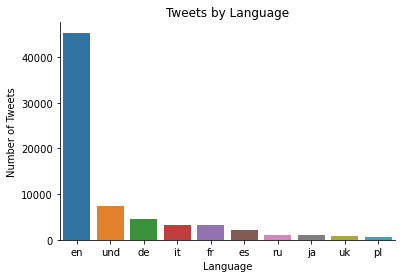

In [131]:
sns.barplot(x = df.language.value_counts()[:10].index, y = df.language.value_counts()[:10]) #plotting the number of tweets by language
plt.title('Tweets by Language')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
sns.despine()


In [64]:
newdf['location'].value_counts()[:10] #top 10 tweeting countries

Ukraine            1418
United States       679
India               590
London, England     437
USA                 415
Earth               327
Украина             318
London              313
Yes                 313
France              297
Name: location, dtype: int64

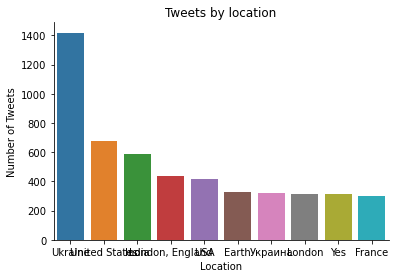

In [69]:
sns.barplot(x = newdf.location.value_counts()[:10].index, y = newdf.location.value_counts()[:10]) #creating a barplot of tweets by user's location
plt.title('Tweets by location')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
sns.despine()


In [72]:
df_en=newdf[newdf["language"]=="en"].drop('language', axis=1) #create a new dataframe df_en and fill it with rows containing English Tweets
df_en.shape

(29320, 16)

In [73]:
sort_tweets = df_en[['username', 'text', 'favorite_count', 'tweetid', ]].sort_values(by = 'favorite_count', ascending = False) #creating a new dataframe and sorting the values by favorite count

In [74]:
favorite_retweeted = sort_tweets.iloc[0]
print(favorite_retweeted.text)

#Ukrainian forces will likely conduct further offensive operations to drive #Russian forces to the #Belarusian border in the coming days.
https://t.co/KV3jRyx7Ue


In [75]:
def preprocess(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')

  # remove the stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

  # remove the old style retweet text RT
    tweet = re.sub(r'^RT[\s]+', '', tweet)

  # remove the hyperlinks 
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

  # removing # symbol
    tweet = re.sub(r'#', '', tweet)

    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tweet_tokens = tokenizer.tokenize(tweet) #splits the sentences into words and then store them as tokens

    tweets_clean = [] 

    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation):
            stem_word = stemmer.stem(word)  # Stemming removes prefixes and suffixes.
            tweets_clean.append(stem_word) #insert the stem_wods to tweets clean list
  
    return " ".join(tweets_clean) #return a sentence by joining words present in the tweets_clean list

preprocess("Hello, how are you")


'hello'

In [76]:
tweetlist=df_en["text"].tolist() #extract text column containing tweets to a new list
newtwl=[] #create a blank list
for t in tweetlist:
    t=preprocess(t)
    newtwl.append(t)  # does tweet processing and then sends the processed text to the new list.


In [77]:
df1=pd.DataFrame(newtwl,columns=['txt']) #initialize new dataframe and add the list containing processed text
df1.head()

,txt
0,imag russia acquir past two decad putin-medved...
1,sad read russianarmi invad chernobyl without t...
2,read .\n.\n.\n.\n. peac ukrain democraci war p...
3,🇷 🇺 💢 🇺 🇦 🛢 ️ ⛽ ️ 💶 putin say foreign buyer mu...
4,jaim antoin discuss initi reaction ukrain cris...


In [78]:
df_en['processed_text']=df1['txt'].values #create a new column in existing dataframe df_en, copy the values from text column from new dataframe df1

In [79]:
import nltk.sentiment.vader as vd #import vader sentiment analyser to label the tweets with sentiments.
from nltk import download
download('vader_lexicon')  
sia = vd.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hchas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [80]:
df_en['scores'] = df_en['processed_text'].apply(lambda review: sia.polarity_scores(review)) #apply vader analyser to processed text column
                                                                                            #store the sentiment score in a new column name called 'scores'

df_en.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,coordinates,favorite_count,extractedts,processed_text,scores
9,1275475606684172290,medyanews_,"Medya News offers news, stories, columns, rese...","Kurdistan, Worldwide",167,6102,6651,2020-06-23 17:07:56.000000,1509681953418711050,2022-04-01 00:00:00.000000,0,"""The image that Russia acquired over the past ...","[{'text': 'Putin', 'indices': [69, 75]}, {'tex...",NaN,0,2022-04-01 00:44:20.080995,imag russia acquir past two decad putin-medved...,"{'neg': 0.064, 'neu': 0.936, 'pos': 0.0, 'comp..."
11,1086730932667568128,QueerTestimony,"Church Leader. BA- MBI\nEarth Scientist. BS, M...","Ontario, Canada",470,261,7766,2019-01-19 21:03:39.000000,1509681953636700160,2022-04-01 00:00:00.000000,0,Sad to read of the #RussianArmy invading of #C...,"[{'text': 'RussianArmy', 'indices': [19, 31]},...",NaN,0,2022-04-01 00:09:36.929425,sad read russianarmi invad chernobyl without t...,"{'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'comp..."
19,1023285701872377856,ScoopusaM,Our mission is to provide a platform to discus...,"Philadelphia, PA",236,97,1466,2018-07-28 19:14:57.000000,1509681957524979718,2022-04-01 00:00:01.000000,0,Read: https://t.co/kzxUuS6Z4d\n.\n.\n.\n.\n.\n...,"[{'text': 'Peace', 'indices': [40, 46]}, {'tex...",NaN,0,2022-04-01 00:44:20.030967,read .\n.\n.\n.\n. peac ukrain democraci war p...,"{'neg': 0.181, 'neu': 0.744, 'pos': 0.074, 'co..."
26,2722503240,vubblePOP,"Vubble is here to interpret, understand and da...",Everywhere,2176,3175,62668,2014-08-10 21:38:54.000000,1509681960066584593,2022-04-01 00:00:02.000000,1,🇷🇺💢🇺🇦🛢️⛽️💶\n\nPutin says foreign buyers must p...,"[{'text': 'Putin', 'indices': [120, 126]}, {'t...",NaN,0,2022-04-01 00:44:19.972569,🇷 🇺 💢 🇺 🇦 🛢 ️ ⛽ ️ 💶 putin say foreign buyer mu...,"{'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'comp..."
34,1269660949776158720,Retractionmedia,Jaime & Antoine debate politics & ponder scien...,"New Jersey, USA",1981,2181,7813,2020-06-07 16:02:26.000000,1509681971563319300,2022-04-01 00:00:05.000000,0,Jaime and Antoine discuss their initial reacti...,"[{'text': 'Ukraine', 'indices': [72, 80]}, {'t...",NaN,0,2022-04-01 00:14:21.299468,jaim antoin discuss initi reaction ukrain cris...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [82]:
df_en['compound']  = df_en['scores'].apply(lambda score_dict: score_dict['compound']) #combine the sentiment score and store it in a new column called compound

df_en.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,coordinates,favorite_count,extractedts,processed_text,scores,compound
9,1275475606684172290,medyanews_,"Medya News offers news, stories, columns, rese...","Kurdistan, Worldwide",167,6102,6651,2020-06-23 17:07:56.000000,1509681953418711050,2022-04-01 00:00:00.000000,0,"""The image that Russia acquired over the past ...","[{'text': 'Putin', 'indices': [69, 75]}, {'tex...",NaN,0,2022-04-01 00:44:20.080995,imag russia acquir past two decad putin-medved...,"{'neg': 0.064, 'neu': 0.936, 'pos': 0.0, 'comp...",-0.0772
11,1086730932667568128,QueerTestimony,"Church Leader. BA- MBI\nEarth Scientist. BS, M...","Ontario, Canada",470,261,7766,2019-01-19 21:03:39.000000,1509681953636700160,2022-04-01 00:00:00.000000,0,Sad to read of the #RussianArmy invading of #C...,"[{'text': 'RussianArmy', 'indices': [19, 31]},...",NaN,0,2022-04-01 00:09:36.929425,sad read russianarmi invad chernobyl without t...,"{'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'comp...",-0.7579
19,1023285701872377856,ScoopusaM,Our mission is to provide a platform to discus...,"Philadelphia, PA",236,97,1466,2018-07-28 19:14:57.000000,1509681957524979718,2022-04-01 00:00:01.000000,0,Read: https://t.co/kzxUuS6Z4d\n.\n.\n.\n.\n.\n...,"[{'text': 'Peace', 'indices': [40, 46]}, {'tex...",NaN,0,2022-04-01 00:44:20.030967,read .\n.\n.\n.\n. peac ukrain democraci war p...,"{'neg': 0.181, 'neu': 0.744, 'pos': 0.074, 'co...",-0.5106
26,2722503240,vubblePOP,"Vubble is here to interpret, understand and da...",Everywhere,2176,3175,62668,2014-08-10 21:38:54.000000,1509681960066584593,2022-04-01 00:00:02.000000,1,🇷🇺💢🇺🇦🛢️⛽️💶\n\nPutin says foreign buyers must p...,"[{'text': 'Putin', 'indices': [120, 126]}, {'t...",NaN,0,2022-04-01 00:44:19.972569,🇷 🇺 💢 🇺 🇦 🛢 ️ ⛽ ️ 💶 putin say foreign buyer mu...,"{'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'comp...",-0.6486
34,1269660949776158720,Retractionmedia,Jaime & Antoine debate politics & ponder scien...,"New Jersey, USA",1981,2181,7813,2020-06-07 16:02:26.000000,1509681971563319300,2022-04-01 00:00:05.000000,0,Jaime and Antoine discuss their initial reacti...,"[{'text': 'Ukraine', 'indices': [72, 80]}, {'t...",NaN,0,2022-04-01 00:14:21.299468,jaim antoin discuss initi reaction ukrain cris...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [83]:
df_en['Sentiment']=df_en['compound'].apply(lambda c: 'Positive' if c> 0.05 else ('Negative' if c<-0.05 else 'Neutral')) #label the compound scores as Positive,negative or neutral depending on their value. Store the labels in new column called sentiment

In [84]:
df_en['Sentiment'].value_counts() #count the number of each sentiments within the dataset

Negative    12101
Positive     8887
Neutral      8332
Name: Sentiment, dtype: int64

In [95]:
df_en[df_en['Sentiment']=='Positive'].location.value_counts()[:5] #top 5 positive tweeting locations

United States              188
Ukraine                    148
Brooklyn, New York, USA    145
India                      128
Canada                     103
Name: location, dtype: int64

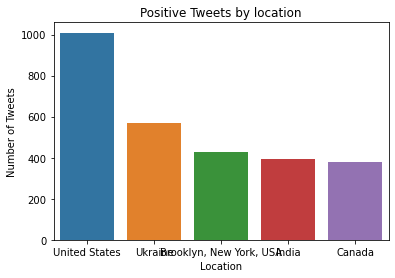

<Figure size 7200x7200 with 0 Axes>

In [98]:
#plot the above resluts in a bar plot

sns.barplot(x = df_en[df_en['Sentiment']=='Positive'].location.value_counts()[:5].index, y = df_en.location.value_counts()[:5])
plt.title('Positive Tweets by location')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.figure(figsize=(100,100))
sns.despine()


In [99]:
#top 5 negative tweeting locations
df_en[df_en['Sentiment']=='Negative'].location.value_counts()[:5]

Ukraine          567
United States    225
USA              187
us               178
India            168
Name: location, dtype: int64

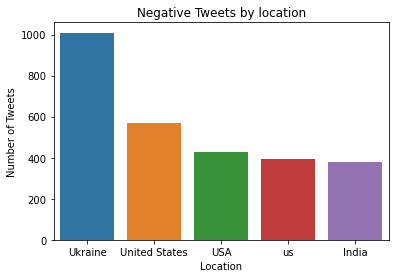

<Figure size 7200x7200 with 0 Axes>

In [100]:
sns.barplot(x = df_en[df_en['Sentiment']=='Negative'].location.value_counts()[:5].index, y = df_en.location.value_counts()[:5])
plt.title('Negative Tweets by location')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.figure(figsize=(100,100))
sns.despine()

In [115]:
df_pos=df_en[df_en["Sentiment"]=="Positive"].drop('Sentiment', axis=1) #create a new dataframe df_en and fill it with rows containing English Tweets
df_pos.shape

(8887, 19)

In [116]:
sort_pos = df_pos[['username', 'text', 'favorite_count', 'tweetid', ]].sort_values(by = 'favorite_count', ascending = False) #create a new dataframe df_en and fill it with rows containing Positive Tweets

In [117]:
favorite_positive = sort_pos.iloc[0] #print the most positive tweet
print(favorite_positive.text)

#Ukrainian forces will likely conduct further offensive operations to drive #Russian forces to the #Belarusian border in the coming days.
https://t.co/KV3jRyx7Ue


In [118]:
df_neg=df_en[df_en["Sentiment"]=="Negative"].drop('Sentiment', axis=1) #create a new dataframe df_en and fill it with rows containing Negative Tweets
df_neg.shape

(12101, 19)

In [120]:
sort_neg = df_neg[['username', 'text', 'favorite_count', 'tweetid', ]].sort_values(by = 'favorite_count', ascending = False)

In [122]:
favorite_negative = sort_neg.iloc[0] #Print the most negative tweet
print(favorite_negative.text)

Day 37: From #Snipers to #Scouts &amp; Spl Forces: #Ukraine army firms up presence in #Irpin, #Bucha, #Brovary &amp; beyond. #Russia says reduction in hostilities a confidence building measure, Ukraine forces say #Russian forces pushed back after hard fought battles.
 #RussiaUkraineWar. https://t.co/BB2kYVzUtZ


In [31]:
df_en.to_csv(r'D:\Coursera\engtweets.csv') #export the dataset as csv